<h2>NAGA VENKATA SATYA AJAY KUMAR AMPAJALAPU </h2>

<h2> THE SPARKS FOUNDATION GRIPJULY21 INTERNSHIP </h2>

<h2> TASK - 3 </h2>

## Exploratory Data Analysis - Retail

<h3><i> Importing Libraries</i></h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading data into a DataFrame

df=pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
# Checking and Droping of Duplicate rows in the data

df.drop_duplicates(inplace=True)

In [7]:
# Checking for null values

df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
df.shape

(9977, 13)

### EDA to find weak areas , where additional care is to be taken inorder to increase profits

In [9]:
# Total profit for various Shipping modes

df.groupby('Ship Mode')['Profit'].sum().sort_values()

Ship Mode
Same Day           15871.8869
First Class        48953.6561
Second Class       57446.6516
Standard Class    163969.2280
Name: Profit, dtype: float64

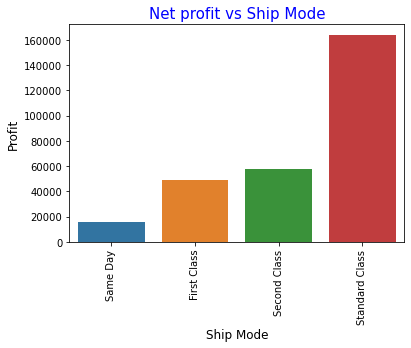

In [10]:
# Visualization of Total profit for various Shipping modes

sns.barplot(x=df.groupby('Ship Mode')['Profit'].sum().sort_values().index,
            y=df.groupby('Ship Mode')['Profit'].sum().sort_values().values)
plt.xticks(rotation=90)
plt.title('Net profit vs Ship Mode',fontsize=15,c='b')
plt.xlabel('Ship Mode',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. Least profit is for same day shipping mode
2. Highest Profit is for standard class shipping mode 

In [11]:
# Total profit for various Segments

df.groupby('Segment')['Profit'].sum().sort_values()

Segment
Home Office     60279.0015
Corporate       91954.9798
Consumer       134007.4413
Name: Profit, dtype: float64

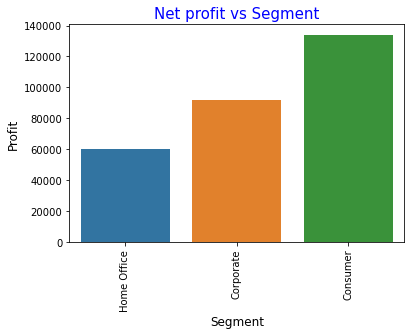

In [12]:
# Visualization of Total profit for various Segments

sns.barplot(x=df.groupby('Segment')['Profit'].sum().sort_values().index,
            y=df.groupby('Segment')['Profit'].sum().sort_values().values)
plt.xticks(rotation=90)
plt.title('Net profit vs Segment',fontsize=15,c='b')
plt.xlabel('Segment',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. Least profit is for Home Office segment
2. Highest Profit is for Consumer segment 

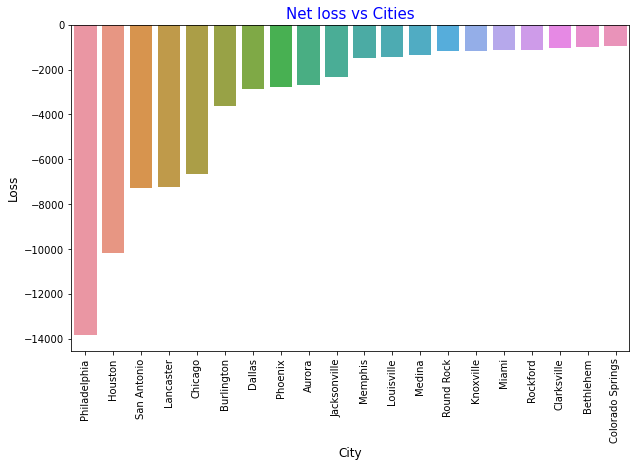

In [13]:
# Visualization of top 20 cities that are incurring loss to the store

plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('City')['Profit'].sum().sort_values().head(20).index,
            y=df.groupby('City')['Profit'].sum().sort_values().head(20).values)
plt.xticks(rotation=90)
plt.title('Net loss vs Cities',fontsize=15,c='b')
plt.xlabel('City',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.show()

##### Conclusion:

1. Philadelphia and Houston are incurring highest losses to the store

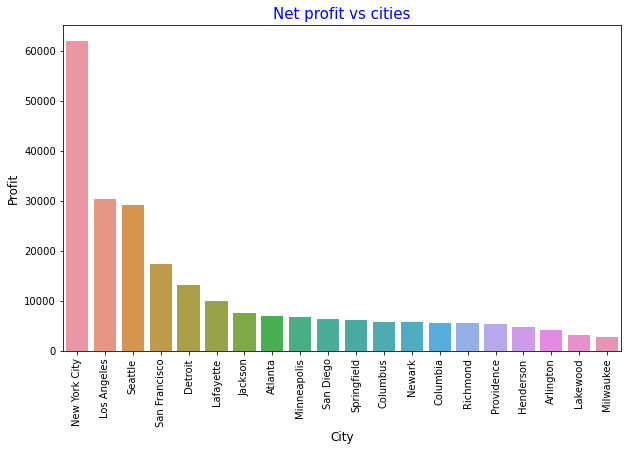

In [14]:
# Visualization of top 20 cities that are adding profits to the store

plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20).index,
            y=df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(20).values)
plt.xticks(rotation=90)
plt.title('Net profit vs cities',fontsize=15,c='b')
plt.xlabel('City',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. New York city adds highest profit to the store
2. Los Angeles and Seattle adds profit next to New york coty

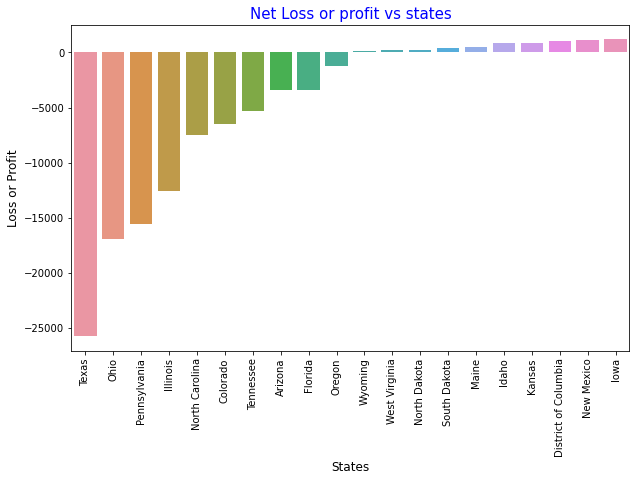

In [15]:
# Visualization of Loss and profit from the states, that are adding less value to the store's profit

plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('State')['Profit'].sum().sort_values().head(20).index,
            y=df.groupby('State')['Profit'].sum().sort_values().head(20).values)
plt.xticks(rotation=90)
plt.title('Net Loss or profit vs states',fontsize=15,c='b')
plt.xlabel('States',fontsize=12)
plt.ylabel('Loss or Profit',fontsize=12)
plt.show()

##### Conclusion:

1. Texas is incurring high loss to the store, followed by Ohio and Pennysylvania
2. Wyoming, West Virginia, North Dokota are adding least profit to the store

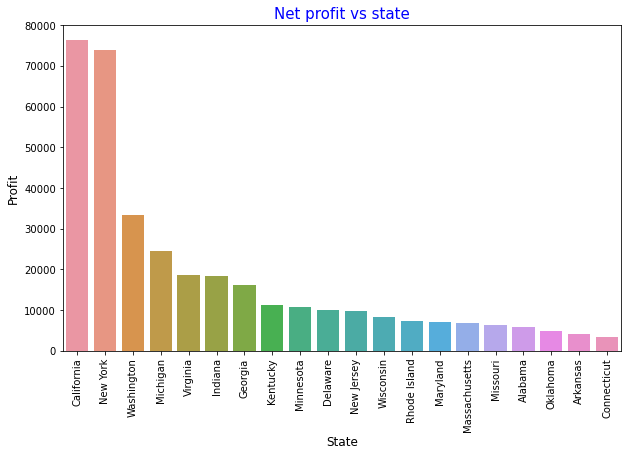

In [16]:
# Visualization of States that are adding more profit to the store

plt.figure(figsize=(10,6))
sns.barplot(x=df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20).index,
            y=df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(20).values)
plt.xticks(rotation=90)
plt.title('Net profit vs state',fontsize=15,c='b')
plt.xlabel('State',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### conclusion:

1. California and New York are adding High profits to the store

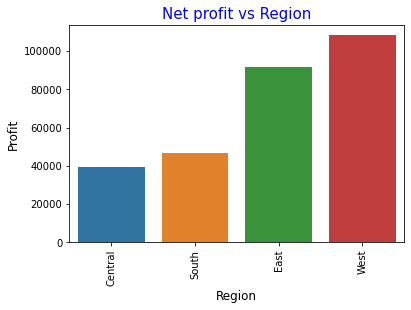

In [17]:
# Visualization of Profits vs regions

sns.barplot(x=df.groupby('Region')['Profit'].sum().sort_values().index,
            y=df.groupby('Region')['Profit'].sum().sort_values().values)
plt.xticks(rotation=90)
plt.title('Net profit vs Region',fontsize=15,c='b')
plt.xlabel('Region',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. West region provide more profits whereas central region provides less profits

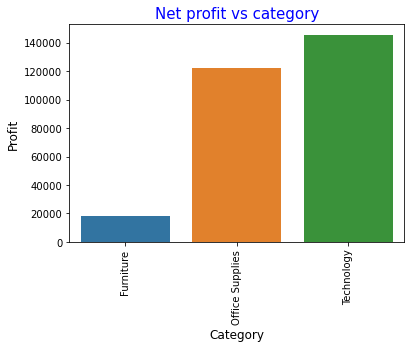

In [18]:
# Visualization of Profit vs Categories

sns.barplot(x=df.groupby('Category')['Profit'].sum().sort_values().index,
            y=df.groupby('Category')['Profit'].sum().sort_values().values)
plt.xticks(rotation=90)
plt.title('Net profit vs category',fontsize=15,c='b')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. Products from Technlogy category adds more profit to the store
2. Products from Furniture category adds less profit to the store

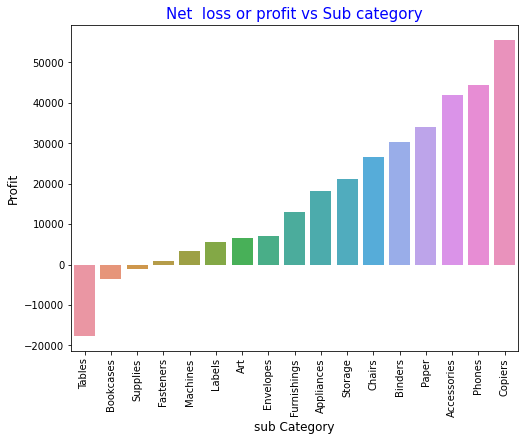

In [19]:
# Visualization of Loss or Profit for Sub categories in the store

plt.figure(figsize=(8,6))
sns.barplot(x=df.groupby('Sub-Category')['Profit'].sum().sort_values().index,
            y=df.groupby('Sub-Category')['Profit'].sum().sort_values().values)
plt.xticks(rotation=90)
plt.title('Net  loss or profit vs Sub category',fontsize=15,c='b')
plt.xlabel('sub Category',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. Tables incur more loss to the store
2. Copiers adds more profit to the store, followed by Phones and Accessories

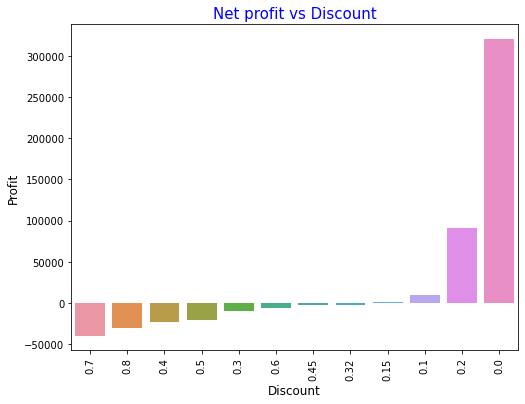

In [20]:
# Visualization of Loss or profit based on the discount offered by the store

plt.figure(figsize=(8,6))
sns.barplot(x=df.groupby('Discount')['Profit'].sum().sort_values().index,
            y=df.groupby('Discount')['Profit'].sum().sort_values().values,
            order=df.groupby('Discount')['Profit'].sum().sort_values().index)
plt.xticks(rotation=90)
plt.title('Net profit vs Discount',fontsize=15,c='b')
plt.xlabel('Discount',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.show()

##### Conclusion:

1. Store gains high profits on products with zero discount
2. Store gets loss when they offer a discount more than or equal to 0.3

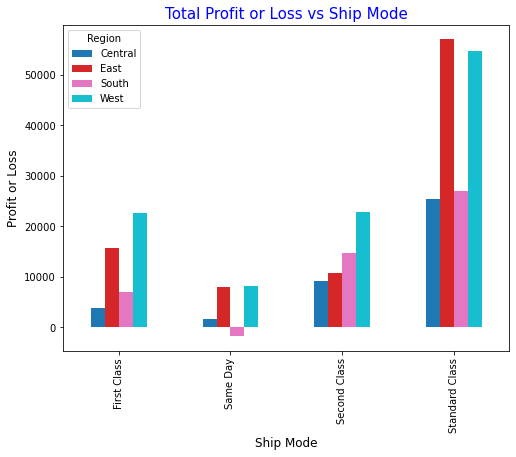

In [21]:
# Visualization of Profit or loss based on ship mode for different regions

pd.crosstab(index=df['Ship Mode'],columns=df['Region'],values=df['Profit'],aggfunc='sum').plot(kind='bar',figsize=(8,6),colormap='tab10')
plt.title('Total Profit or Loss vs Ship Mode',fontsize=15,color='blue')
plt.xlabel('Ship Mode',fontsize=12)
plt.ylabel('Profit or Loss',fontsize=12)
plt.show()

##### Conclusion:

1. Products that are of Same day Ship mode from south region incurs loss to the store. Steps are to be taken to decrease this loss.

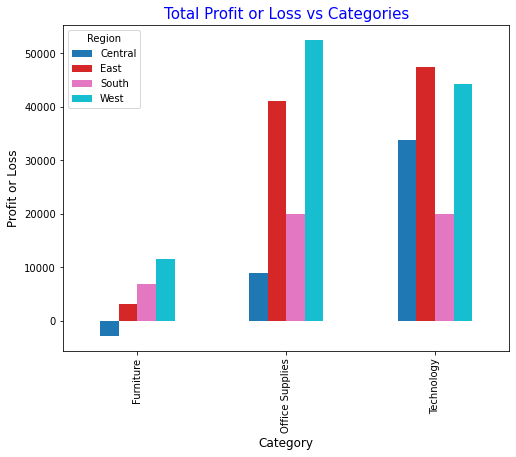

In [22]:
# Visualization of Profit or loss for  categories based on regions

pd.crosstab(index=df['Category'],columns=df['Region'],values=df['Profit'],aggfunc='sum').plot(kind='bar',figsize=(8,6),colormap='tab10')
plt.title('Total Profit or Loss vs Categories',fontsize=15,color='blue')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Profit or Loss',fontsize=12)
plt.show()

##### Conclusion:

1. Products of Furniture category from Central region incurs loss to the store.Steps are to be taken to reduce this loss.

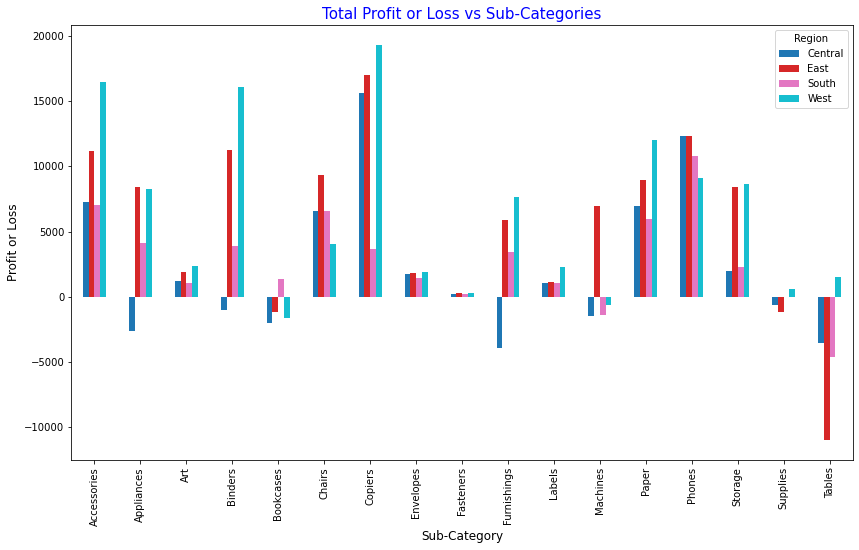

In [23]:
# Visualization of Profit or loss for  Sub-categories based on regions

pd.crosstab(index=df['Sub-Category'],columns=df['Region'],values=df['Profit'],aggfunc='sum').plot(kind='bar',figsize=(14,8),colormap='tab10')
plt.title('Total Profit or Loss vs Sub-Categories',fontsize=15,color='blue')
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Profit or Loss',fontsize=12)
plt.show()

##### Conclusion:

 The following are Sub-Categories and regions which incurs loss to the store
    
    Sub-Category        Region
    Appliances          Central
    Binders             Central
    Bookcases           Central, East, West
    Fumishings          Central
    Machines            Central, South, West
    Supplies            Central, East
    Tables              Central, East ,South

 Steps are to be taken by the store to minimize these losses

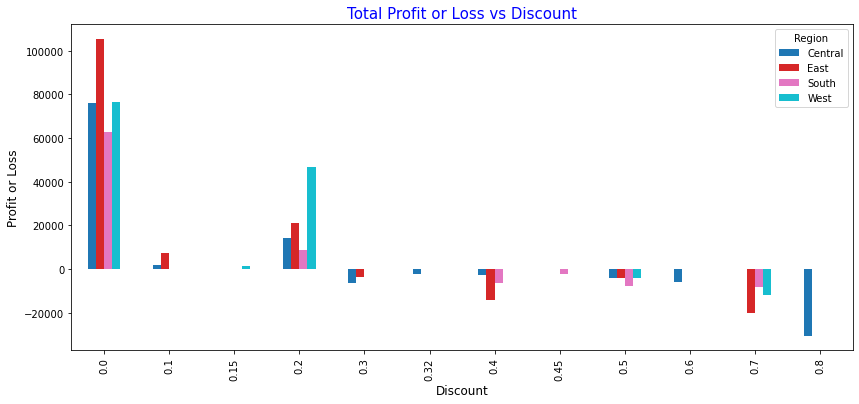

In [24]:
# Visualization of Profit or loss for  Discounts based on regions

pd.crosstab(index=df['Discount'],columns=df['Region'],values=df['Profit'],aggfunc='sum').plot(kind='bar',figsize=(14,6),colormap='tab10')
plt.title('Total Profit or Loss vs Discount',fontsize=15,color='blue')
plt.xlabel('Discount',fontsize=12)
plt.ylabel('Profit or Loss',fontsize=12)
plt.show()

##### Conclusion:

Irrespective if the regions, with a discount greater than or equal to 3 ,there is a loss.
Reconsider the Discount, inorder to minimize the loss